<a href="https://colab.research.google.com/github/zebrassimo/NN/blob/master/MyFirstNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris data investigation
Thy is my first try to make a ML of the iris dataset, so let's load it first.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets
iris=datasets.load_iris()

print("targets: "+str(iris.target_names))
print("features: "+str(iris.feature_names))
print("TF Version: ", tf.__version__)
print("GPU available: ", tf.test.is_gpu_available())

Instructions for updating:
non-resource variables are not supported in the long term
targets: ['setosa' 'versicolor' 'virginica']
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
TF Version:  2.3.0
GPU available:  True


Now that the data is loaded, let's print some charts.

data[:,i] means that we're using all data 

check out the users guide of matplotlib: https://matplotlib.org/users/index.html

#Check what it looks like

0


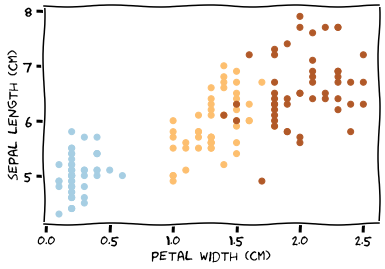

1


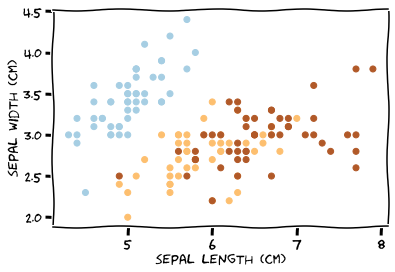

2


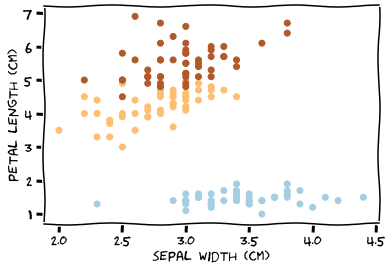

3


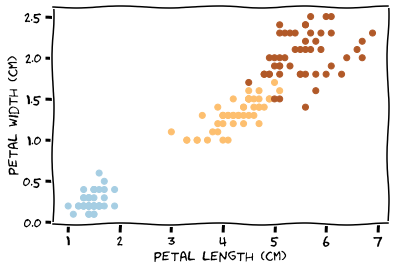

In [13]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

for i in range(4):
    print(i)
    with plt.xkcd():
        plt.scatter(iris.data[:,i-1],iris.data[:,i],c=iris.target, cmap=plt.cm.Paired)
        plt.xlabel(iris.feature_names[i-1])
        plt.ylabel(iris.feature_names[i])
        #plt.legend()
        plt.show()

Let's define the activation function

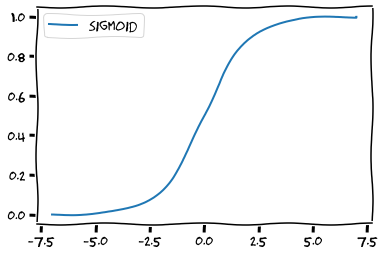

In [14]:
import numpy as np
def sigmoid(a):
        return 1/(1+np.exp(-a))

x = np.linspace(-7, 7, 1000)

#plt.subplots()
with plt.xkcd():
    plt.plot(x,sigmoid(x), label="sigmoid")
    plt.legend()
    plt.show()

now, we're multiplying the leaf sizes (features) with a static multiplication matrix

In [15]:
import numpy as np
mult_matrix = np.array([[-0.2,0.2],[-1.0,1.0]])
bias=np.array([0.1,-0.1])

for features in iris.data:
    our_feature =[features[2]-3,features[2]-2]
    
    a=np.matmul(our_feature,mult_matrix)
    #print("activations before: "+str(a))
    a=a+bias #bias must be added before the sigmoid function is called
    a=sigmoid(a)
    #print("activations : "+str(a))



The following executes a simple forward pass

In [16]:
n_input=len(iris.data[0])
n_output=3
input_shape=[None, n_input]
learningrate=0.1

ipph      = tf.placeholder(dtype=tf.float32,shape=input_shape, name="ipph")

weights   = tf.Variable(tf.random_normal([n_input,n_output]), name="weights")
biases    = tf.Variable(tf.zeros([n_output]), name="biases")
print(weights)
print(biases)

layer1    = tf.matmul(ipph,weights)
layer2    = tf.add(layer1,biases)
output_layer  = tf.nn.sigmoid(layer2)
print("output_l: "+str(output_layer))

lpph      = tf.placeholder(dtype=tf.float32,shape=[None, n_output], name= "labels_placeholder")
cost      = tf.losses.mean_squared_error(lpph,output_layer)
#print("cost: "+str(cost))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learningrate).minimize(cost) #https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer
#print("optimizer: "+str(optimizer))

<tf.Variable 'weights:0' shape=(4, 3) dtype=float32_ref>
<tf.Variable 'biases:0' shape=(3,) dtype=float32_ref>
output_l: Tensor("Sigmoid:0", shape=(?, 3), dtype=float32)


Some initialization needs to occur

In [17]:
init    = tf.global_variables_initializer()
sess    = tf.Session()
sess.run(init)

Scaling the activations 

In [18]:
from sklearn import preprocessing
from sklearn import model_selection 
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
scaler = preprocessing.StandardScaler().fit(iris.data)
scaled_data = scaler.transform(iris.data)
scaled_data_test = scaler.transform(x_test)

In [19]:
mydata = list(zip(scaled_data, iris.target))

the amount of inputs to train our network with

In [20]:
batch_size = 10

how many updates we want to apply on our network

In [21]:
iterations = 4000

Now we need to to the back propagation

0.21805023
0.2894971
0.24775033
0.24991246
0.2160665
0.18410161
0.1591862
0.1986626
0.21884266
0.23532368
0.22628917
0.20352758
0.22963862
0.13122874
0.18899661
0.18303838
0.21090494
0.23866643
0.21072625
0.22466609
0.1752645
0.179116
0.25703597
0.17273709
0.22969843
0.31272933
0.19492626
0.1742811
0.1692203
0.15854149
0.19066185
0.16339128
0.15363458
0.19246468
0.184856
0.18789534
0.1553474
0.14923233
0.13879013
0.16180325
0.2289588
0.16118869
0.19721584
0.22030878
0.17164683
0.16818851
0.19101213
0.22882481
0.10840085
0.24967334
0.22025079
0.17121011
0.15309289
0.12359365
0.18760796
0.15566938
0.1651439
0.15126722
0.18929835
0.11253587
0.21451442
0.16415809
0.17337045
0.1682273
0.1878629
0.10985286
0.17821507
0.12544686
0.12137814
0.20311694
0.14163189
0.14663595
0.17825113
0.14179596
0.13737808
0.19663034
0.16387194
0.09415193
0.14497946
0.1585379
0.11597317
0.1620364
0.159316
0.12308278
0.14795853
0.12220893
0.13137631
0.13002466
0.12937137
0.1212579
0.109908015
0.10974421
0.123558

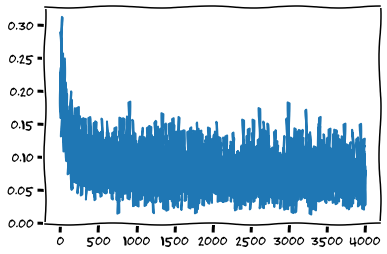

In [22]:
import random

history_loss = list()
for _ in range(iterations):
    inputdata = list()
    output_data = list()
    for _ in range(batch_size):
        input_output_pairs = random.choice(mydata)
        inputdata.append(input_output_pairs[0])
        output_one_hot = [0.0,0.0,0.0]
        output_one_hot[input_output_pairs[1]] = 1.0
        output_data.append(output_one_hot)

    res_optimizer, res_cost = sess.run([optimizer, cost], feed_dict={ipph: inputdata, lpph: output_data})
    print(res_cost)
    history_loss.append(res_cost)

with plt.xkcd():
    plt.plot(history_loss)
        